In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
#Logistik Regresi 1
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [4]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [5]:
model.classes_

array([0, 1])

In [6]:
print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


In [7]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [8]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [9]:
'Accuracy = '+str(9/10*100)+'%'

'Accuracy = 90.0%'

In [10]:
print(model.score(x, y))
print('Accuracy = '+str(model.score(x, y)*100)+'%')

0.9
Accuracy = 90.0%


In [11]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [12]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

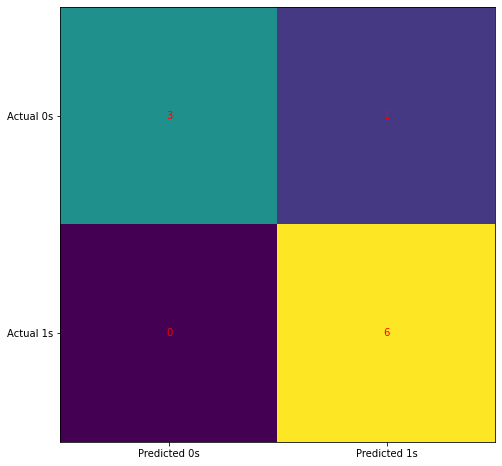

In [14]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [15]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [16]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [17]:
print(model.intercept_, model.coef_)

[-3.51335372] [[1.12066084]]


In [18]:
print(model.predict_proba(x))

[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]


In [19]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [20]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [21]:
model.predict(np.array([100]).reshape(-1, 1))

array([1])

In [22]:
model.score(x, y)

1.0

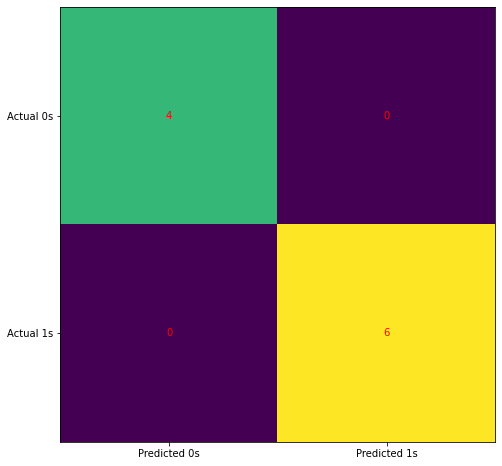

In [23]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [24]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [25]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
x, y = load_digits(return_X_y=True)

In [27]:
len(x), len(y)

(1797, 1797)

In [28]:
1797*.2, 1797*.8

(359.40000000000003, 1437.6000000000001)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)
print(x_train)

[[ 0.  0.  0. ... 16. 16.  6.]
 [ 0.  3. 12. ... 16.  2.  0.]
 [ 0.  1. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]
 [ 0.  0.  6. ... 11.  0.  0.]]


In [48]:
#Logistik Regresi Handwriting (Standard Scaler)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
print(x_train)

[[ 0.         -0.33790435 -1.09141592 ...  1.58325794  3.53125595
   3.30213343]
 [ 0.          2.90642897  1.41696421 ...  1.58325794  0.00595786
  -0.18695903]
 [ 0.          0.74354009  0.99890086 ... -1.14493411 -0.49765616
  -0.18695903]
 ...
 [ 0.         -0.33790435 -0.04625753 ... -1.14493411 -0.49765616
  -0.18695903]
 [ 0.         -0.33790435 -0.25528921 ... -1.14493411 -0.49765616
  -0.18695903]
 [ 0.         -0.33790435  0.16277415 ...  0.73069792 -0.49765616
  -0.18695903]]


In [49]:
#model
model = LogisticRegression(solver='liblinear',  
                           C=.05, 
                           multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [50]:
x_test = scaler.fit_transform(x_test)

In [51]:
y_pred = model.predict(x_test)

In [52]:
model.score(x_train, y_train)

0.964509394572025

In [53]:
model.score(x_test, y_test)

0.95

In [54]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 2,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]], dtype=int64)

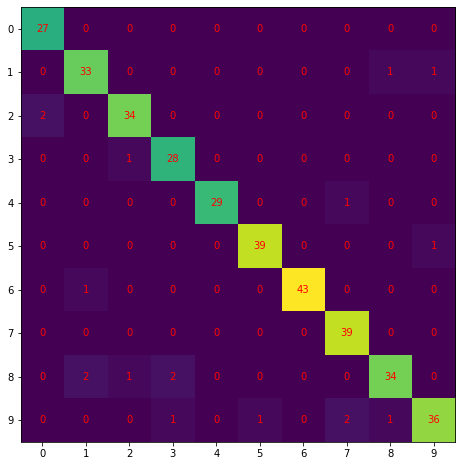

In [55]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [56]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       0.92      0.94      0.93        35
           2       0.94      0.94      0.94        36
           3       0.90      0.97      0.93        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       0.93      1.00      0.96        39
           8       0.94      0.87      0.91        39
           9       0.95      0.88      0.91        41

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [60]:
#K-Nearest Neighbor(KNN)
#scikit-learn conoth 1, mendefenisikan data
weather = ['S', 'S', 'O', 'R', 'R', 'R', 'O', 'S', 'S', 'R' ,'S', 'O', 'O', 'R']
temp = ['H', 'H', 'H', 'M', 'C', 'C', 'C', 'M', 'C', 'M', 'M', 'M','H','M']
play = ['N','N','Y','Y','Y','N','Y','N','Y','Y','Y','Y','Y', 'N']

#Arti code di atas
# First Feature
#weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny',
          #'Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
#temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool',
       #'Mild','Mild','Mild','Hot','Mild']

# Label or target variable
#play = ['No','No','Yes','Yes','Yes','No','Yes','No',
        #'Yes','Yes','Yes','Yes','Yes','No']

In [62]:
#encoding data
from sklearn.preprocessing import LabelEncoder

In [63]:
le = LabelEncoder()

weather_ec = le.fit_transform(weather)
print(weather_ec)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [64]:
temp_ec = le.fit_transform(temp)
print(temp_ec)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [65]:
label = le.fit_transform(play)
print(label)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [66]:
#combine features
features = list(zip(weather_ec, temp_ec))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [73]:
#mengenerate model
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(features, label)

predicted = model.predict([[0, 2]])

print(predicted)

[1]


In [74]:
#KNN in Python With scikit-learn: KNN with Multiple Labels
# Loading Data 

from sklearn import datasets

wine = datasets.load_wine()

In [75]:
# Exploring Data 

print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [76]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [77]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [78]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [83]:
print(wine.data.shape)
print(wine.target.shape)

(178, 13)
(178,)


In [85]:
# Splitting Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)


In [86]:
# Generating Model for K=5

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [88]:
# Model Evaluation for k=5

from sklearn import metrics 

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6851851851851852


In [89]:
# Re-generating Model for K=7

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [90]:
from sklearn import metrics 

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7592592592592593


In [91]:
error = [] 

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

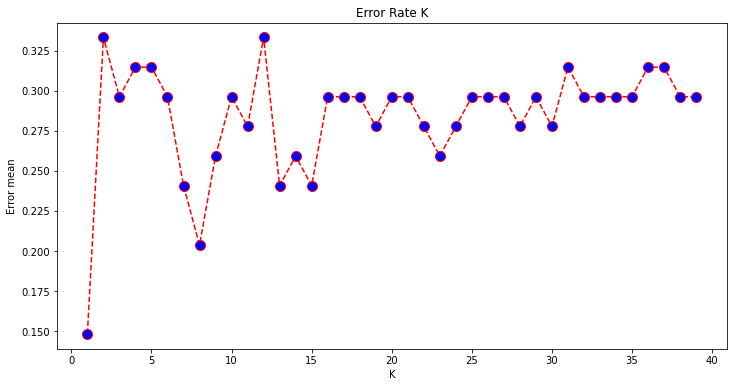

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed',
        marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

In [98]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 25)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn import metrics 

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7037037037037037
